## Observations and Insights 

   ### by Jose Luis Duarte

  - The four least efficient Drug Regimen are:
  > Zoniferol, Stelasyn, Naftisol and Ketapril

  - Capomulin and Ramicane are the Drug Regimen more consistenly of the four best treatments
  - Infubinol is the treatment with more variability than the other three best treatments
  - Ceftamin is the treatment with otuliers than the other three best treatments
  


About the Specimens:
  - The mouse with ID s185, over time it had a dramatic reduction in the volume of its tumor with the drug Capomulin
  - Reviewing the mouse with ID l509, its reduction was staggered with a rebound in the last timepoint.
  - For the specimens treated with a Capomulin,which indicates a proportional relationship between weight vs tumor volumen, more weight greater tumor volume.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_ms_df = pd.merge(mouse_metadata, study_results, how="left",on="Mouse ID")


In [2]:
#Total registers in the merge dataframe
merge_ms_df['Mouse ID'].count()

1893

In [3]:
# Checking the number of mice in the DataFrame.
df_only_mouse = merge_ms_df.groupby('Mouse ID').nunique().reset_index()
df_only_mouse["Mouse ID"].count()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = merge_ms_df.loc[merge_ms_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
print(f"The Mouse Id duplicated was:{dup_mouse}")

The Mouse Id duplicated was:['g989']


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_ms_df = merge_ms_df[merge_ms_df["Mouse ID"].isin(dup_mouse) == False]
clean_ms_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mouse_num=len(clean_ms_df["Mouse ID"].unique())
print(f" The new number of mice en the clean Dataframe is: {new_mouse_num}")

 The new number of mice en the clean Dataframe is: 248


## Summary Statistics

In [8]:
# Creating a Dataframe base on the Clean Dataframe grouping by Drug Regimen and Tumor Volume
reg_clean_ms_df = clean_ms_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
reg_clean_ms_df

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [9]:
sum_stat_df = pd.DataFrame(clean_ms_df.groupby("Drug Regimen").count())
sum_stat_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Creating a Dataframe base on the Clean Dataframe to generated the number of test by Drug Regimen
# Later we have to replace the columns for the statistics values columns
sum_stat_df = pd.DataFrame(clean_ms_df.groupby("Drug Regimen").count())

#Creating the statistics columns in the Dataframe Summary
sum_stat_df["Mean"] = pd.DataFrame(clean_ms_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
sum_stat_df["Median"] = pd.DataFrame(clean_ms_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
sum_stat_df["Standard Deviation"] = pd.DataFrame(clean_ms_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
sum_stat_df["Variance"] = pd.DataFrame(clean_ms_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
sum_stat_df["SEM"] = pd.DataFrame(clean_ms_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Select the columns related to statistics values
sum_stat_df = sum_stat_df[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
sum_stat_df = sum_stat_df.rename(columns = {"Mouse ID" : "#Test"})

sum_stat_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,#Test,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,148,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar Plots

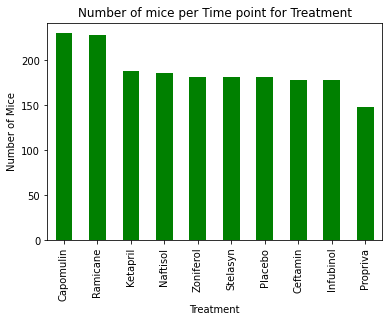

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course 
#of the study using pandas. 
num_mice_drug = clean_ms_df["Drug Regimen"].value_counts()
num_mice_drug.plot(kind="bar", title ="Number of mice per Time point for Treatment", ylabel="Number of Mice", xlabel="Treatment", color="green")
plt.show()

In [12]:
num_mice_drug.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

Text(0.5, 1.0, 'Number of mice per Time point for Treatment')

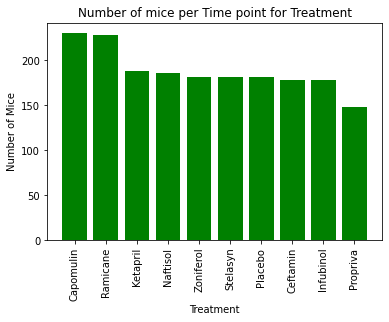

In [13]:
plt.bar(num_mice_drug.index,num_mice_drug.values, color ="green")
plt.xticks(rotation=90)
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")
plt.title("Number of mice per Time point for Treatment")

## Pie Plots

In [14]:
clean_ms_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


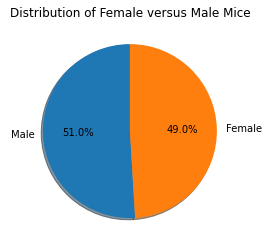

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dist_fm = clean_ms_df["Sex"].value_counts()

dist_fm.plot(kind="pie", shadow = True, startangle=90,ylabel= " ",autopct = '%1.1f%%',title ="Distribution of Female versus Male Mice")
plt.show()

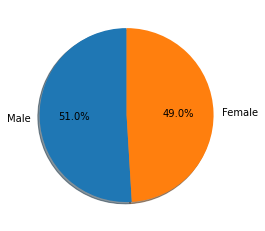

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes_graph = dist_fm.values
labels_graph = dist_fm.index
explode=[0.1,0]
plt.pie(sizes_graph, labels=labels_graph, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title = ("Distribution of Female versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
reg_clean_ms_df

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Identifying the most promising treatment regimens
reg_clean_ms_df
new_reg_clean = reg_clean_ms_df[["max"]]
best_four_reg = new_reg_clean.sort_values(by=["max"],ascending = True)
best_four_reg


,max
Drug Regimen,
Ramicane,47.622816
Capomulin,48.158209
Ceftamin,68.923185
Infubinol,72.226731
Propriva,72.455421
Placebo,73.212939
Zoniferol,73.324432
Stelasyn,75.123690
Naftisol,76.668817


In [19]:
last_tp_df = clean_ms_df.groupby("Mouse ID").max().reset_index()


In [20]:
# Creating Dataframe gruping by Mouse ID with particulary the max Timepoint Value
last_tp_df = clean_ms_df.groupby("Mouse ID").max().reset_index()

#Merge the Max Dataframe with Clean Dataframe base on Mouse ID and Timepoint maximum

mg_last_tp_clean=last_tp_df[["Mouse ID","Timepoint"]].merge(clean_ms_df, on=["Mouse ID","Timepoint"], how='left')



In [21]:
Ramicane= last_tp_df.loc[mg_last_tp_clean['Drug Regimen'] == "Ramicane"]['Tumor Volume (mm3)']
Capomulin= last_tp_df.loc[mg_last_tp_clean['Drug Regimen'] == "Capomulin"]['Tumor Volume (mm3)']
Ceftamin= last_tp_df.loc[mg_last_tp_clean['Drug Regimen'] == "Ceftamin"]['Tumor Volume (mm3)']
Infubinol= last_tp_df.loc[mg_last_tp_clean['Drug Regimen'] == "Infubinol"]['Tumor Volume (mm3)']

In [22]:
# Calculate IQR for Ramicane
qt_rami = Ramicane.quantile([.25,.5,.75])
q1_rami = qt_rami[.25]
q3_rami = qt_rami[.75]
iqr_rami = q3_rami - q1_rami

lw_out_rami = q1_rami - (1.5*iqr_rami)
up_out_rami = q3_rami + (1.5*iqr_rami)

# Calculate IQR for Capomulin
qt_capo = Capomulin.quantile([.25,.5,.75])
q1_capo = qt_capo[.25]
q3_capo = qt_capo[.75]
iqr_capo = q3_capo - q1_capo

lw_out_capo = q1_capo - (1.5*iqr_capo)
up_out_capo = q3_capo + (1.5*iqr_capo)

# Calculate IQR for Ceftamin
qt_ceft = Ceftamin.quantile([.25,.5,.75])
q1_ceft = qt_ceft[.25]
q3_ceft = qt_ceft[.75]
iqr_ceft = q3_ceft - q1_ceft

lw_out_ceft = q1_ceft - (1.5*iqr_ceft)
up_out_ceft= q3_ceft + (1.5*iqr_ceft)

# Calculate IQR for Infubinol
qt_infu = Infubinol.quantile([.25,.5,.75])
q1_infu = qt_infu[.25]
q3_infu = qt_infu[.75]
iqr_infu = q3_infu - q1_infu

lw_out_infu = q1_infu - (1.5*iqr_infu)
up_out_infu= q3_infu + (1.5*iqr_infu)

print(f" Ramicane Outlier Low Limit {round(lw_out_rami, 2)}")
print(f" Ramicane Outlier High Limit {round(up_out_rami, 2)}")
print(f" Interquartile range (IQR): %s" % iqr_rami )
print("-------------------------------------")
print(f" Capomulin Outlier Low Limit {round(lw_out_capo, 2)}")
print(f" Capomulin Outlier High Limit {round(up_out_capo, 2)}")
print(f" Interquartile range (IQR): %s" % iqr_capo )
print("-------------------------------------")
print(f" Ceftamin Outlier Low Limit {round(lw_out_ceft, 2)}")
print(f" Ceftamin Outlier High Limit {round(up_out_ceft, 2)}")
print(f" Interquartile range (IQR): %s" % iqr_ceft )
print("-------------------------------------")
print(f" Infubinol Outlier Low Limit {round(lw_out_infu, 2)}")
print(f" Infubinol Outlier High Limit {round(up_out_infu, 2)}")
print(f" Interquartile range (IQR): %s" % iqr_infu )

 Ramicane Outlier Low Limit 42.98
 Ramicane Outlier High Limit 48.36
 Interquartile range (IQR): 1.3438323700000012
-------------------------------------
 Capomulin Outlier Low Limit 42.38
 Capomulin Outlier High Limit 49.37
 Interquartile range (IQR): 1.7490055199999972
-------------------------------------
 Ceftamin Outlier Low Limit 25.36
 Ceftamin Outlier High Limit 87.67
 Interquartile range (IQR): 15.577752179999997
-------------------------------------
 Infubinol Outlier Low Limit 36.83
 Infubinol Outlier High Limit 82.74
 Interquartile range (IQR): 11.477135160000003


TypeError: 'str' object is not callable

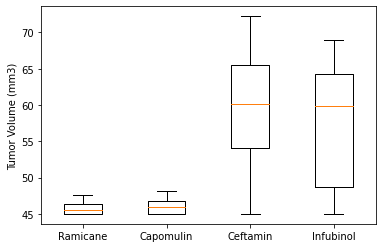

In [23]:
highlight = dict(markerfacecolor='red',markersize=12)

# Creating Simple Box Plot for the best Drug Regimen
plt.boxplot([Ramicane, Capomulin, Infubinol, Ceftamin], labels=["Ramicane","Capomulin","Ceftamin","Infubinol"], flierprops= highlight)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Box Plot Best Drug Regime")
plt.xlabe("Drug Regime")
plt.show()

TypeError: 'str' object is not callable

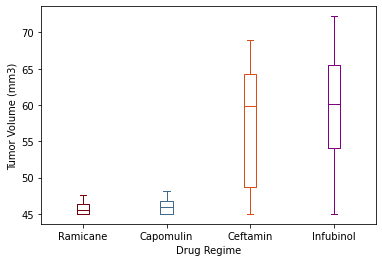

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
highlight = dict(markerfacecolor='black',markersize=15)
colors = ['#73020C', '#426A8C', '#D94D1A', '#800080']
colors_Ramicane  = dict(color=colors[0])
colors_Capomulin  = dict(color=colors[1])
colors_Ceftamin  = dict(color=colors[2])
colors_Infubinol   = dict(color=colors[3])


plt.boxplot([Ramicane],labels=["Ramicane"], positions=[1],flierprops = highlight, boxprops=colors_Ramicane, medianprops=colors_Ramicane, whiskerprops=colors_Ramicane,capprops=colors_Ramicane)
plt.boxplot([Capomulin],labels=["Capomulin"], positions=[2],flierprops = highlight, boxprops=colors_Capomulin, medianprops=colors_Capomulin, whiskerprops=colors_Capomulin,capprops=colors_Capomulin)
plt.boxplot([Ceftamin],labels=["Ceftamin"], positions=[3],flierprops = highlight, boxprops=colors_Ceftamin, medianprops=colors_Ceftamin, whiskerprops=colors_Ceftamin,capprops=colors_Ceftamin)
plt.boxplot([Infubinol],labels=["Infubinol"], positions=[4],flierprops = highlight, boxprops=colors_Infubinol, medianprops=colors_Infubinol, whiskerprops=colors_Infubinol,capprops=colors_Infubinol)
plt.xlabel("Drug Regime")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Energy output from various fuel sources")
plt.show()

## Line and Scatter Plots

In [25]:
capo_df= clean_ms_df.loc[clean_ms_df['Drug Regimen'] == 'Capomulin']
capo_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


TypeError: 'str' object is not callable

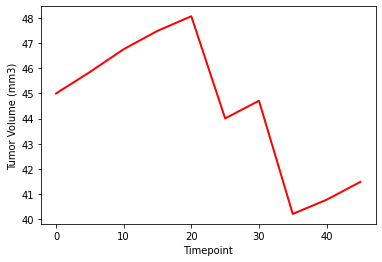

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# I choose the Mouse ID s185
capo_df= clean_ms_df.loc[clean_ms_df['Drug Regimen'] == 'Capomulin']
ms_capo= clean_ms_df.loc[clean_ms_df['Mouse ID'] == 'l509']



plt.plot(ms_capo["Timepoint"], ms_capo["Tumor Volume (mm3)"], linewidth='2', color='red')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

TypeError: 'str' object is not callable

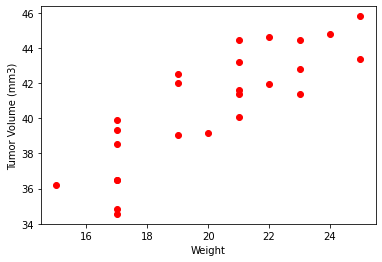

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capo_wg_df= clean_ms_df.loc[clean_ms_df['Drug Regimen'] == 'Capomulin']

capo_avg=capo_wg_df.groupby(["Mouse ID"]).mean()

plt.scatter(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"], color = "red" )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

In [28]:
from scipy import stats

TypeError: 'str' object is not callable

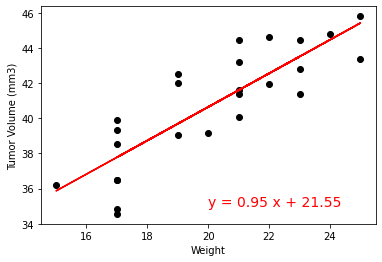

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,r_value, p_value, stderr)= stats.linregress(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])
reg_val=capo_avg["Weight (g)"]* slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"], color="black" )
plt.plot(capo_avg["Weight (g)"], reg_val, color='red')
plt.annotate(line_eq,(20,35), fontsize=14, color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()